# Step 1:
* Make Necessary Imports 


In [1]:
try:
    import pandas as pd 
    import os 
    import sys
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt 
    
    %matplotlib inline 
    
    print("All Modules are Loaded ...  ")
    
except Exception as e:
    
    print("Some Modules are missing {}".format(e))

All Modules are Loaded ...  


D:\Intalled Softwares\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
for x in os.listdir():
    print(x)

.ipynb_checkpoints
20190928-items.csv
20190928-reviews.csv
Analysis.ipynb
README.md


# Step 2:
* know you dataset well 

In [3]:
df = pd.read_csv("20190928-items.csv")
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95


In [4]:
df.shape

(792, 9)

In [5]:
df.describe()

,rating,totalReviews
count,792.000000,792.000000
mean,3.607576,104.231061
std,0.668730,166.242503
min,1.000000,1.000000
25%,3.200000,7.000000
50%,3.700000,31.500000
75%,4.000000,122.250000
max,5.000000,984.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   asin          792 non-null    object 
 1   brand         792 non-null    object 
 2   title         792 non-null    object 
 3   url           792 non-null    object 
 4   image         792 non-null    object 
 5   rating        792 non-null    float64
 6   reviewUrl     792 non-null    object 
 7   totalReviews  792 non-null    int64  
 8   prices        577 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 55.8+ KB


In [7]:
df.isna().count()

asin            792
brand           792
title           792
url             792
image           792
rating          792
reviewUrl       792
totalReviews    792
prices          792
dtype: int64

In [8]:
df.isnull()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
787,False,False,False,False,False,False,False,False,False
788,False,False,False,False,False,False,False,False,False
789,False,False,False,False,False,False,False,False,False
790,False,False,False,False,False,False,False,False,False


#### This shows that columns Prices have some Null or missing Values 

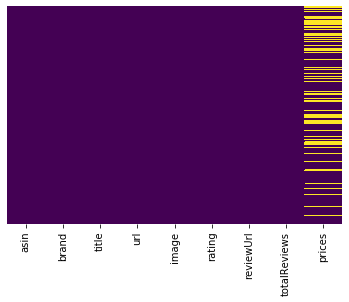

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Here we check how the columns are cor-related with each other

In [10]:
df.corr()

,rating,totalReviews
rating,1.00000,0.06124
totalReviews,0.06124,1.00000


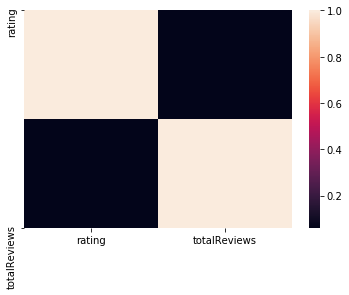

In [11]:
sns.heatmap(df.corr())

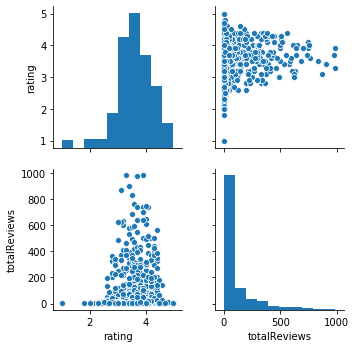

In [12]:
sns.pairplot(df)

# Step 2:
* Question Answering

###### Q) How many Brands are there ?

In [13]:
print(df["brand"].nunique())
df["brand"].unique()

10


array(['Nokia', 'Motorola', 'Sony', 'Samsung', 'HUAWEI', 'Apple',
       'OnePlus', 'Google', 'ASUS', 'Xiaomi'], dtype=object)

##### Q) How Many Brands of Mobile have Maximum ratings 

In [14]:
df['rating'].max()

5.0

In [15]:
df["brand"][df["rating"] == df["rating"].max()]

295     Samsung
349     Samsung
376     Samsung
383     Samsung
415    Motorola
416     Samsung
440      Google
478     Samsung
506     Samsung
522        Sony
558      Xiaomi
559       Apple
583        ASUS
592     Samsung
609    Motorola
611     Samsung
646     Samsung
690     Samsung
701     Samsung
702    Motorola
737     Samsung
761     Samsung
763     Samsung
778      Google
779     Samsung
Name: brand, dtype: object

In [16]:
print(df["brand"][df["rating"] == df["rating"].max()].nunique())
print(print(df["brand"][df["rating"] == df["rating"].max()].unique()))

7
['Samsung' 'Motorola' 'Google' 'Sony' 'Xiaomi' 'Apple' 'ASUS']
None


##### Q) How many  brands has Mininum Ratings what are their names 

In [17]:
print(df["brand"][df["rating"] == df["rating"].min()].nunique())
print(print(df["brand"][df["rating"] == df["rating"].min()].unique()))

4
['Motorola' 'Samsung' 'Apple' 'OnePlus']
None


#### Q) Which Brand has Maximum Number of reviews 

In [18]:
df[["brand", "prices"]][df["totalReviews"] == df["totalReviews"].max()]

,brand,prices
352,Google,$107.70


##### Q) Tell me which brand has maximum rating/review ratio 

In [19]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95


In [20]:
df["rating/review"] = df["rating"]/df["totalReviews"]

In [21]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [22]:
df["brand"][df["rating/review"] == df["rating/review"].max()]

349     Samsung
383     Samsung
478     Samsung
522        Sony
558      Xiaomi
583        ASUS
592     Samsung
609    Motorola
701     Samsung
702    Motorola
737     Samsung
761     Samsung
763     Samsung
778      Google
779     Samsung
Name: brand, dtype: object

In [23]:
df["brand"][df["rating/review"] == df["rating/review"].max()].unique()

array(['Samsung', 'Sony', 'Xiaomi', 'ASUS', 'Motorola', 'Google'],
      dtype=object)

### Tell me brand that has maximum numbers of reviews and how many ?

In [24]:
df1 = df.groupby(by='brand').count()

In [25]:
df1.head()

,asin,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
brand,,,,,,,,,
ASUS,13,13,13,13,13,13,13,11,13
Apple,101,101,101,101,101,101,101,94,101
Google,33,33,33,33,33,33,33,26,33
HUAWEI,36,36,36,36,36,36,36,29,36
Motorola,100,100,100,100,100,100,100,69,100


In [26]:
pd.__version__

'1.1.0'

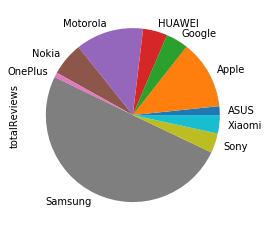

In [27]:
df1["totalReviews"].plot(kind='pie')

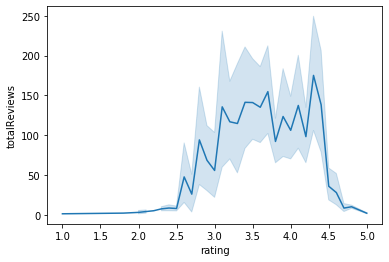

In [28]:
sns.lineplot(x=df["rating"], y=df["totalReviews"])

In [29]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [30]:
df1 = df.groupby(by='brand').mean()

In [31]:
df1["rating"]

brand
ASUS        3.776923
Apple       3.527723
Google      3.763636
HUAWEI      4.019444
Motorola    3.528000
Nokia       3.322449
OnePlus     3.342857
Samsung     3.573300
Sony        3.731034
Xiaomi      4.337037
Name: rating, dtype: float64

Text(0.5, 1.0, 'Brands vs Average Ratings ')

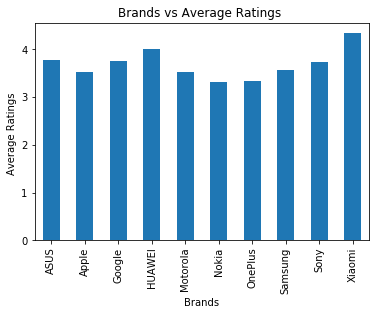

In [32]:

df1["rating"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Ratings ")
plt.title("Brands vs Average Ratings ")


Text(0.5, 1.0, 'Average Total Review vs Brands ')

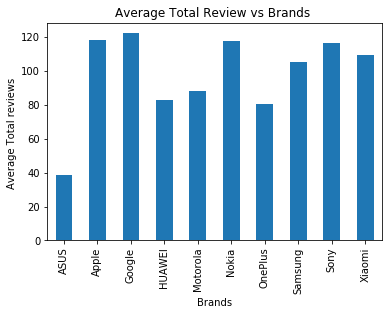

In [33]:
df1["totalReviews"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Total reviews ")
plt.title("Average Total Review vs Brands ")